# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: xx  (TODO)

Group Members:
- Name (NIM)
- Name (NIM)
- ...

## Import Libraries

In [2]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
from csv_reader import CSVReader
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from csv_reader import CSVReader
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin




## Import Dataset

In [3]:
from data import LOCAL_PATH
reader = CSVReader(LOCAL_PATH)

keys = reader.get_available_keys()
data = {
    key: reader.get_data(key) for key in keys if key != "TRAIN_METADATA"
}

df = data["TRAIN_BASIC_FEATURES"]
for key, datas in data.items():
    if key != 'TRAIN_BASIC_FEATURES':
        df = pd.merge(df, datas, on='id', how='inner')
df.drop(columns=["label"], inplace=True)



modified_features_df = reader.get_data("TRAIN_METADATA")
modified_features_df.drop(modified_features_df[modified_features_df['Name'] == 'label'].index, inplace=True)


Successfully loaded TRAIN_FLOW_FEATURES
Successfully loaded TRAIN_LABELS
Successfully loaded TRAIN_METADATA
Successfully loaded TRAIN_CONTENT_FEATURES
Successfully loaded TRAIN_ADDITIONAL_FEATURES
Successfully loaded TRAIN_TIME_FEATURES
Successfully loaded TRAIN_BASIC_FEATURES


# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

In [4]:
display(modified_features_df)


,No.,Name,Type,Description,feature_type
0,5,proto,nominal,Transaction protocol,flow
1,6,state,nominal,Indicates to the state and its dependent proto...,basic
2,7,dur,Float,Record total duration,basic
3,8,sbytes,Integer,Source to destination transaction bytes,basic
4,9,dbytes,Integer,Destination to source transaction bytes,basic
5,10,sttl,Integer,Source to destination time to live value,basic
6,11,dttl,Integer,Destination to source time to live value,basic
7,12,sloss,Integer,Source packets retransmitted or dropped,basic
8,13,dloss,Integer,Destination packets retransmitted or dropped,basic
9,14,service,nominal,"http, ftp, smtp, ssh, dns, ftp-data ,irc and ...",basic


In [5]:
df.describe()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,dload,spkts,...,dmean,trans_depth,response_body_len,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat
count,166619.000000,1.667800e+05,1.664720e+05,166516.000000,166687.000000,166547.000000,166363.000000,1.665550e+05,1.665040e+05,166687.000000,...,166486.000000,166556.000000,1.665500e+05,1.666030e+05,166495.000000,166634.000000,166607.000000,166505.000000,166605.000000,166746.000000
mean,1.359299,8.734079e+03,1.493589e+04,179.521944,79.584179,4.904790,6.971688,7.342186e+07,6.718596e+05,20.266134,...,124.161041,0.106193,2.157133e+03,4.993982e+03,604.891720,987.360974,87.763617,0.041331,0.021042,0.020402
std,6.485386,1.712289e+05,1.430150e+05,102.957427,110.494848,64.867849,51.801936,1.884564e+08,2.422879e+06,136.433895,...,258.265755,0.794070,5.509898e+04,4.506783e+04,4082.439167,7246.462797,987.040024,0.079428,0.043560,0.040619
min,0.000000,2.800000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000008,1.140000e+02,0.000000e+00,62.000000,0.000000,0.000000,0.000000,1.303032e+04,0.000000e+00,2.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000
50%,0.001548,4.500000e+02,1.640000e+02,254.000000,29.000000,0.000000,0.000000,8.714544e+05,1.426630e+03,2.000000,...,44.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.284723,0.006000,0.000000,0.000000,0.000000
75%,0.667311,1.418000e+03,1.096000e+03,254.000000,252.000000,3.000000,2.000000,8.888889e+07,2.807410e+04,12.000000,...,89.000000,0.000000,0.000000e+00,2.511184e+03,114.753348,55.205806,50.933127,0.065151,0.023235,0.038951
max,59.999989,1.296523e+07,1.465555e+07,255.000000,254.000000,4803.000000,5484.000000,5.988000e+09,2.242273e+07,9616.000000,...,1458.000000,172.000000,6.558056e+06,1.460480e+06,289388.269700,84371.496000,56716.824000,2.518893,2.100352,1.520884


In [6]:
df.isnull().sum()

state                8805
dur                  8722
sbytes               8561
dbytes               8869
sttl                 8825
dttl                 8654
sloss                8794
dloss                8978
service              8791
sload                8786
dload                8837
spkts                8654
dpkts                8686
id                      0
is_sm_ips_ports      8746
ct_state_ttl         8635
ct_flw_http_mthd     8647
is_ftp_login         8647
ct_ftp_cmd           8842
ct_srv_src           8851
ct_srv_dst           8774
ct_dst_ltm           8738
ct_src_ltm           8823
ct_src_dport_ltm     8775
ct_dst_sport_ltm     8788
ct_dst_src_ltm       8895
swin                 8740
dwin                 8779
stcpb                8672
dtcpb                8803
smean                8788
dmean                8855
trans_depth          8785
response_body_len    8791
proto                8826
attack_cat              0
sjit                 8738
djit                 8846
sinpkt      

In [7]:
binary_columns = ['is_sm_ips_ports', 'is_ftp_login']


# first we check how many values in the supposed to be binary columns
for col in binary_columns:
    print(f"\n{col} unique values: {df[col].unique()}")
    print(f"{col} value counts: {df[col].value_counts()}")



is_sm_ips_ports unique values: [ 0. nan  1.]
is_sm_ips_ports value counts: is_sm_ips_ports
0.0    163963
1.0      2632
Name: count, dtype: int64

is_ftp_login unique values: [ 0. nan  1.  2.  4.]
is_ftp_login value counts: is_ftp_login
0.0    164251
1.0      2422
4.0        16
2.0         5
Name: count, dtype: int64


In [8]:
# 3. The number of unique values for each categorical features.

# Assume: We really sure the metadata is correct.
# So the categorical is when the type is other than Integer and Float
features = modified_features_df['Name']

categorical_features = modified_features_df[~modified_features_df['Type '].str.contains('integer|float', case=False, na=False)]['Name']

numerical_features = features[~features.isin(categorical_features)]


unique_values = df[categorical_features].nunique().sort_values(ascending=False)
unique_values

proto              133
service             13
attack_cat          10
state                9
is_ftp_login         4
is_sm_ips_ports      2
dtype: int64

In [9]:
print("Numerical Features:")
display(numerical_features)

# Calculate statistical measures for numerical features
statistics = df[numerical_features].agg(['min', 'max', 'mean', 'median', 'std']).transpose()

# Rename columns for clarity
statistics = statistics.rename(columns={
    'min': 'Minimum',
    'max': 'Maximum',
    'mean': 'Mean',
    'median': 'Median',
    'std': 'Standard Deviation'
})

print("Statistical Measures for Numerical Features:")
display(statistics)


Numerical Features:


2                   dur
3                sbytes
4                dbytes
5                  sttl
6                  dttl
7                 sloss
8                 dloss
10                sload
11                dload
12                spkts
13                dpkts
14                 swin
15                 dwin
16                stcpb
17                dtcpb
18                smean
19                dmean
20          trans_depth
21    response_body_len
22                 sjit
23                 djit
24               sinpkt
25               dinpkt
26               tcprtt
27               synack
28               ackdat
30         ct_state_ttl
31     ct_flw_http_mthd
33           ct_ftp_cmd
34           ct_srv_src
35           ct_srv_dst
36           ct_dst_ltm
37           ct_src_ltm
38     ct_src_dport_ltm
39     ct_dst_sport_ltm
40       ct_dst_src_ltm
Name: Name, dtype: object

Statistical Measures for Numerical Features:


,Minimum,Maximum,Mean,Median,Standard Deviation
dur,0.0,5.999999e+01,1.359299e+00,0.001548,6.485386e+00
sbytes,28.0,1.296523e+07,8.734079e+03,450.000000,1.712289e+05
dbytes,0.0,1.465555e+07,1.493589e+04,164.000000,1.430150e+05
sttl,0.0,2.550000e+02,1.795219e+02,254.000000,1.029574e+02
dttl,0.0,2.540000e+02,7.958418e+01,29.000000,1.104948e+02
sloss,0.0,4.803000e+03,4.904790e+00,0.000000,6.486785e+01
dloss,0.0,5.484000e+03,6.971688e+00,0.000000,5.180194e+01
sload,0.0,5.988000e+09,7.342186e+07,871454.437500,1.884564e+08
dload,0.0,2.242273e+07,6.718596e+05,1426.629700,2.422879e+06
spkts,1.0,9.616000e+03,2.026613e+01,2.000000,1.364339e+02


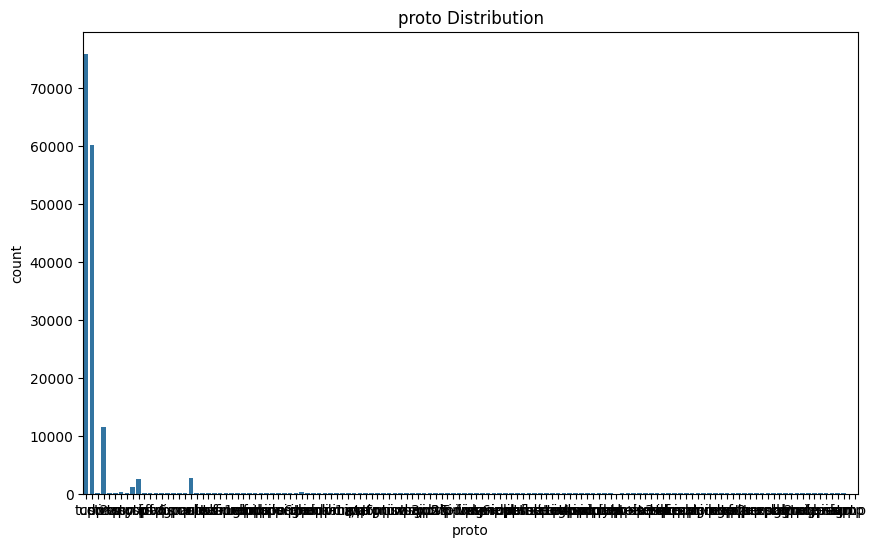

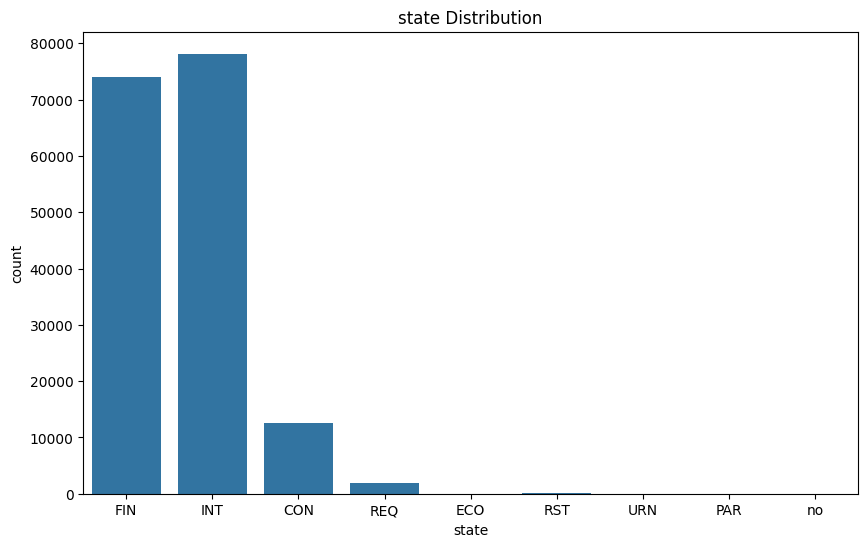

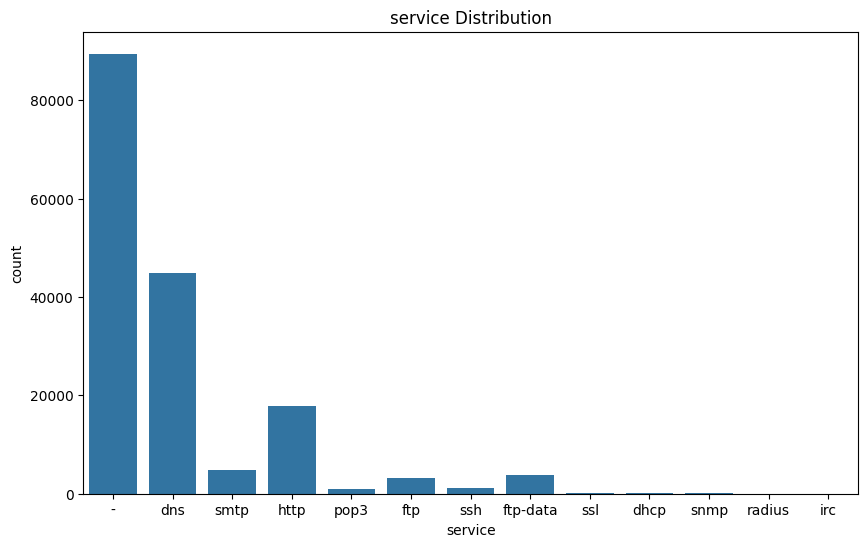

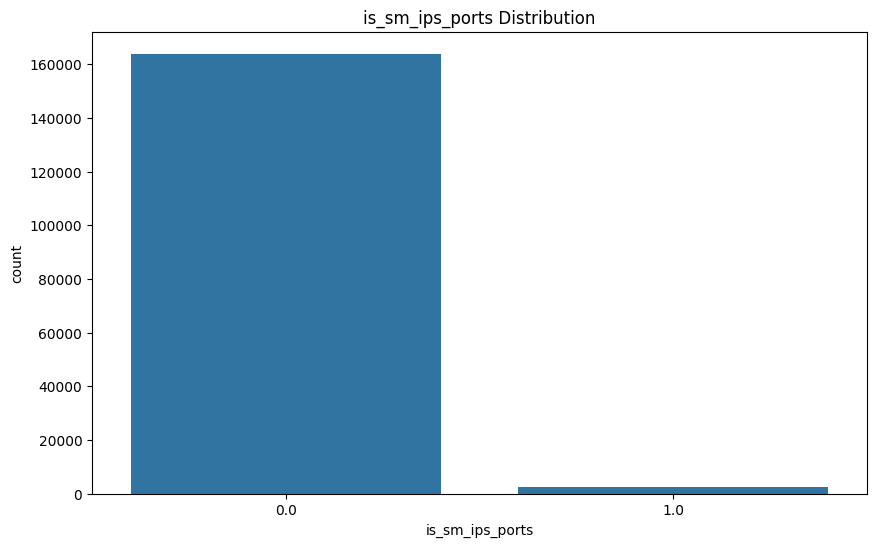

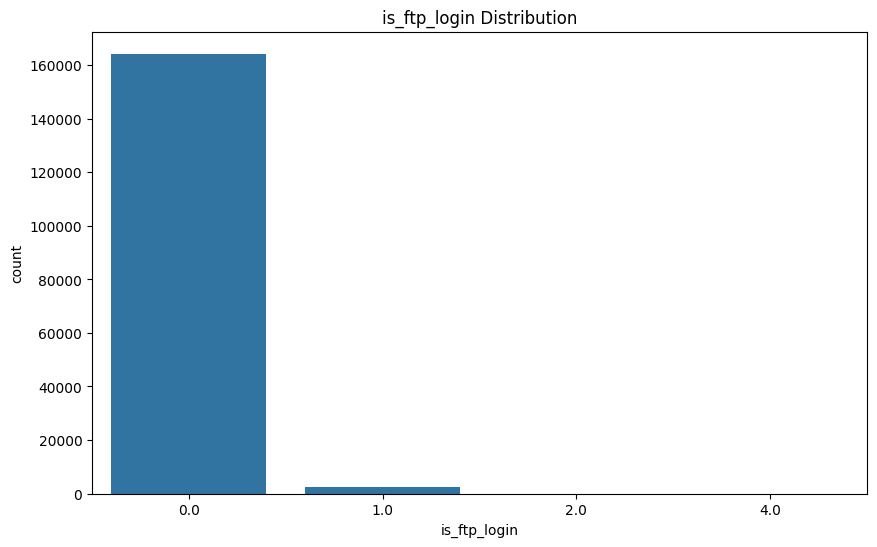

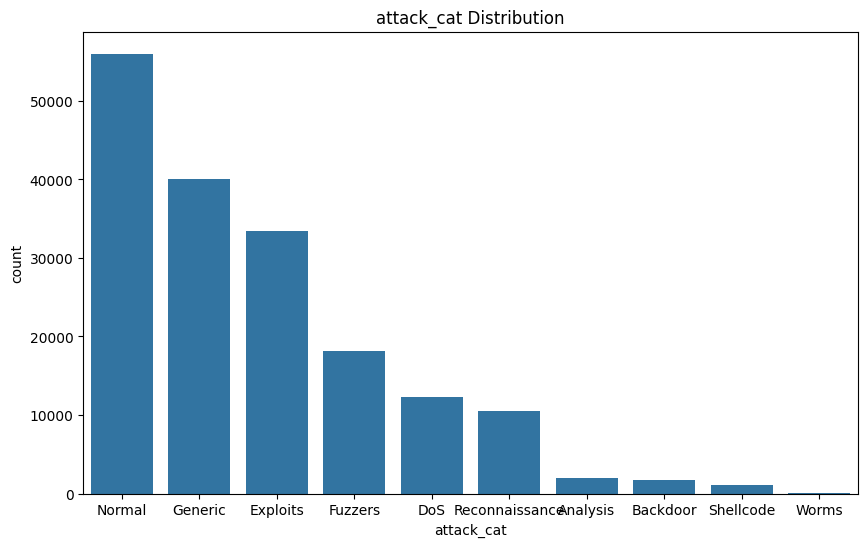

In [10]:
# graph for categorical

for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'{col} Distribution')
    plt.show()

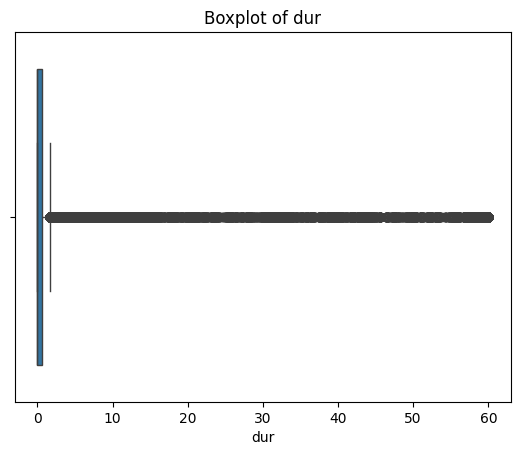

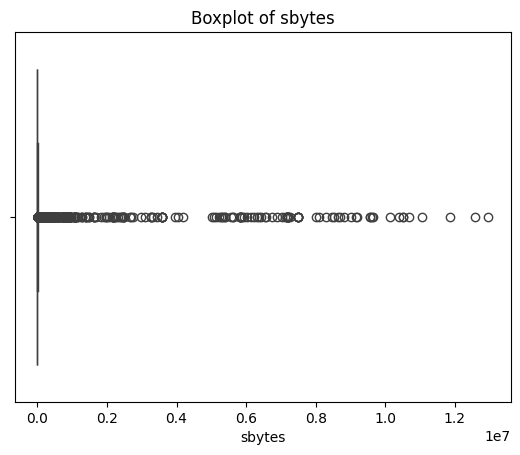

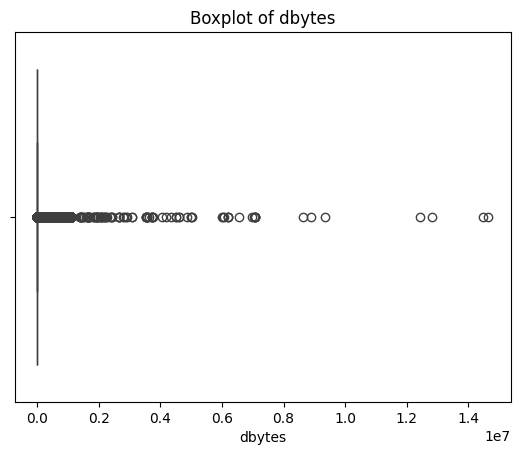

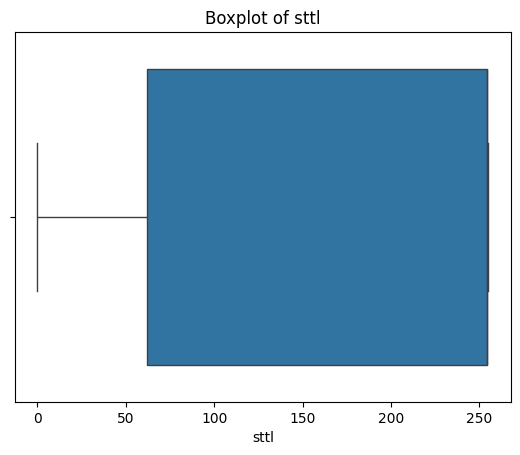

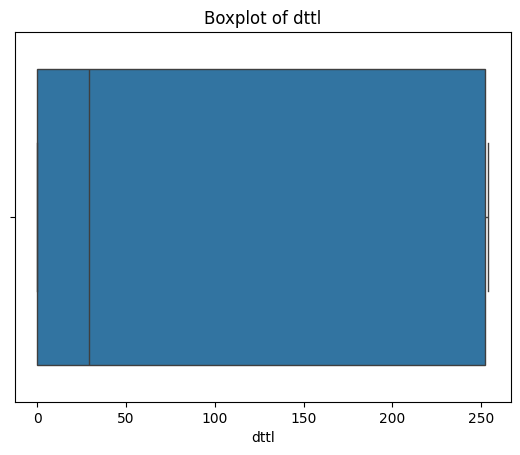

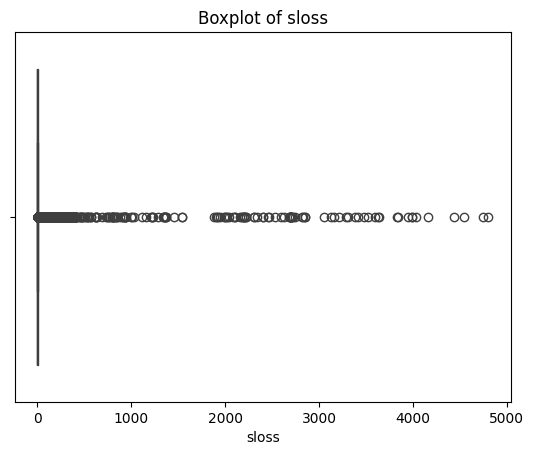

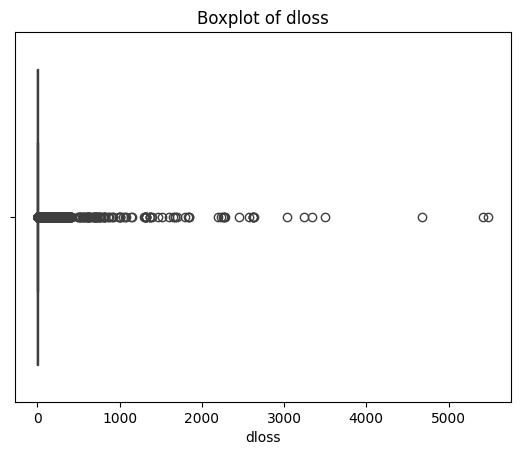

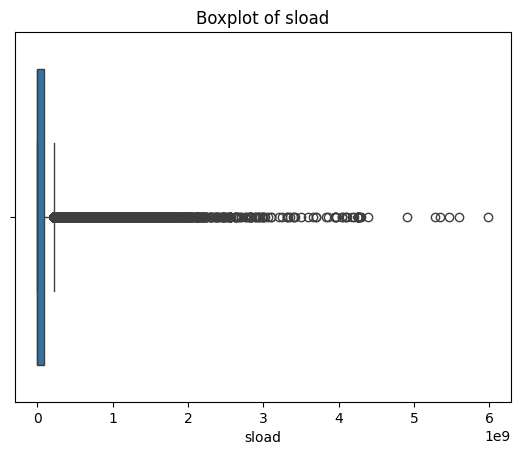

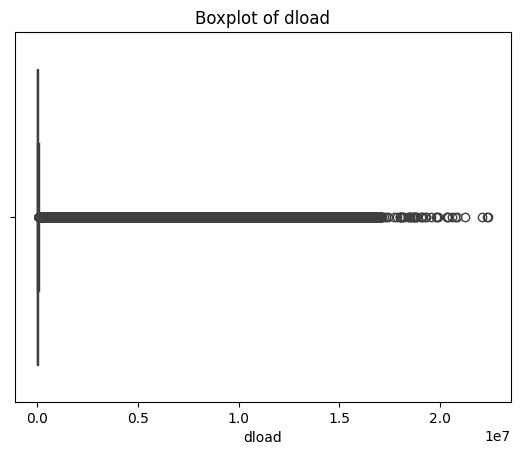

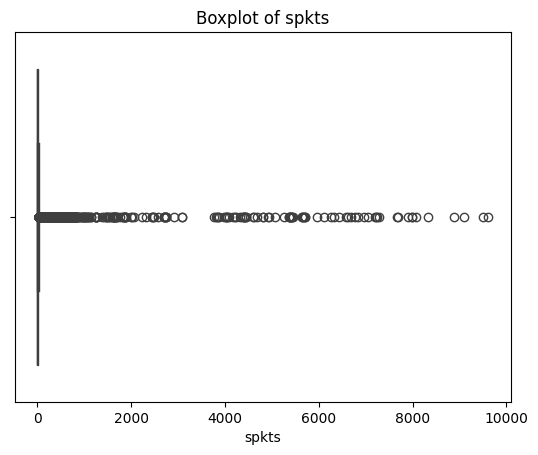

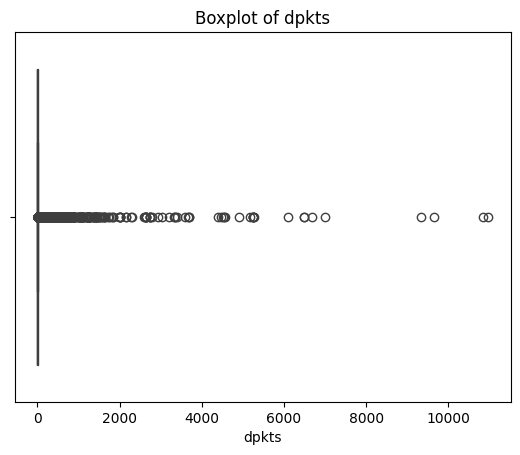

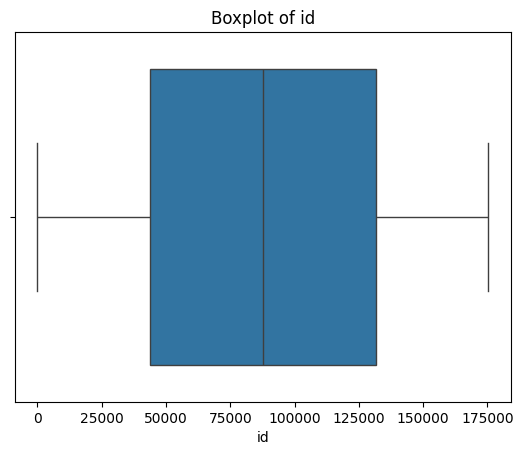

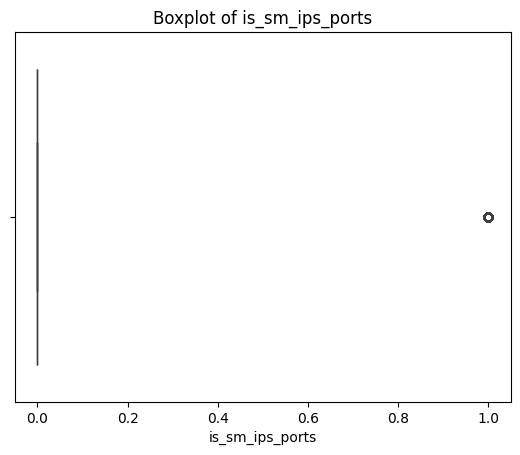

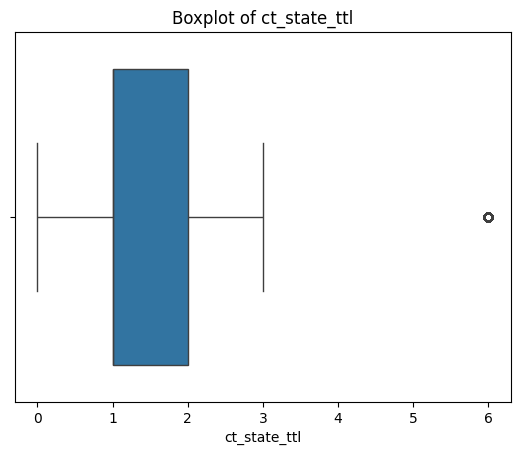

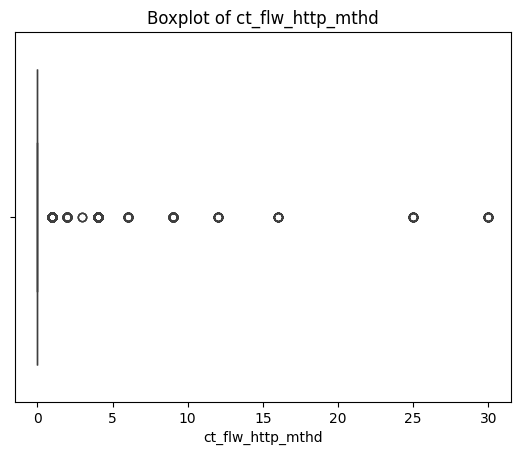

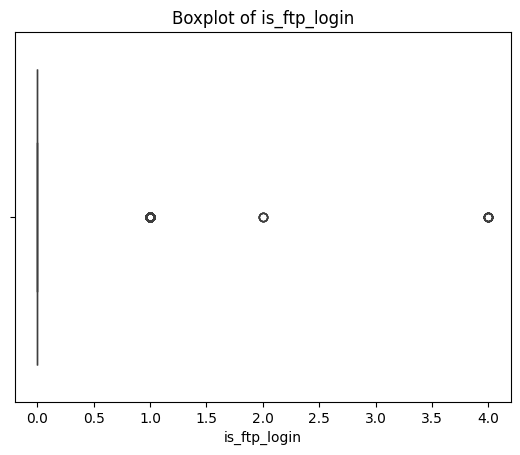

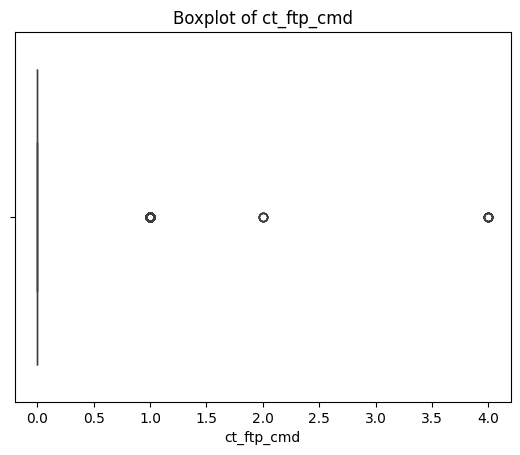

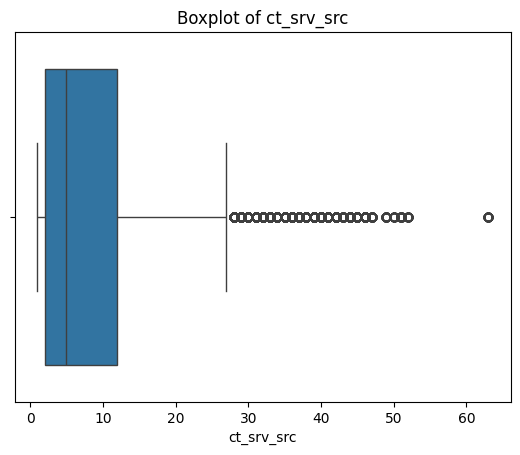

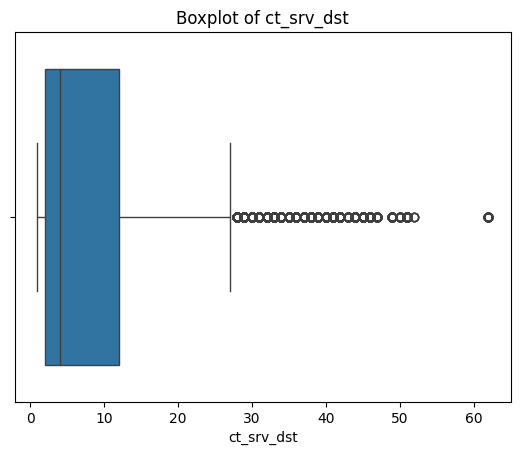

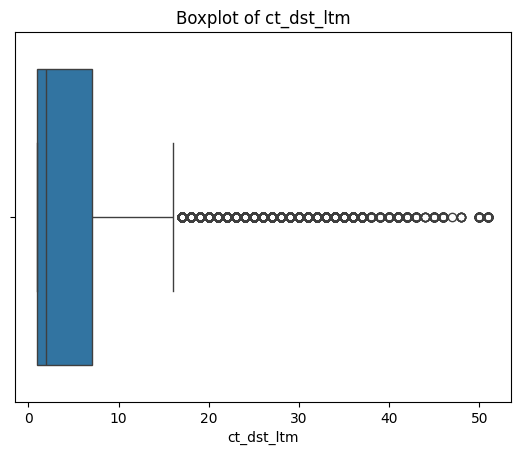

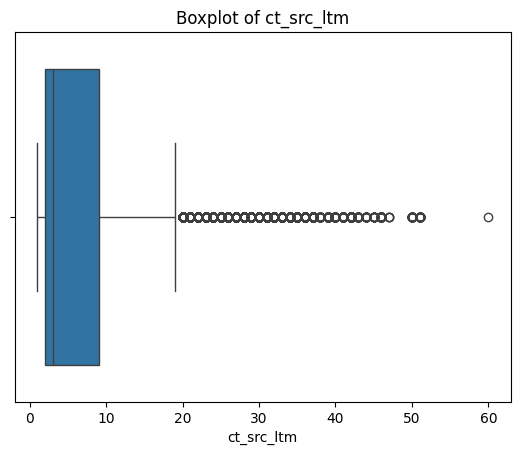

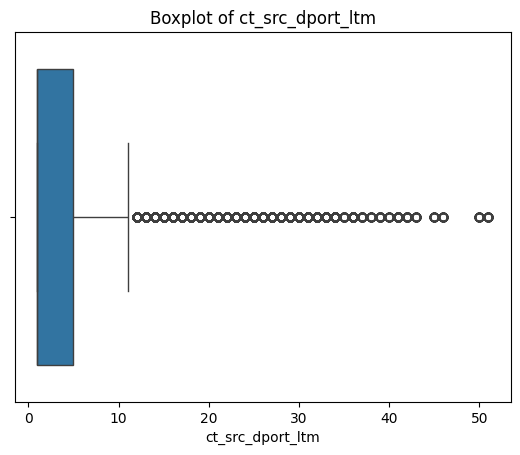

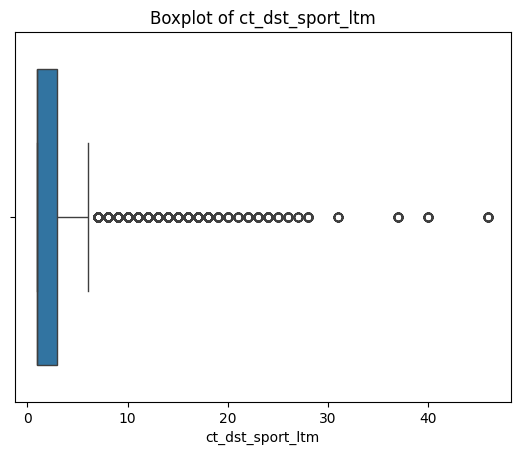

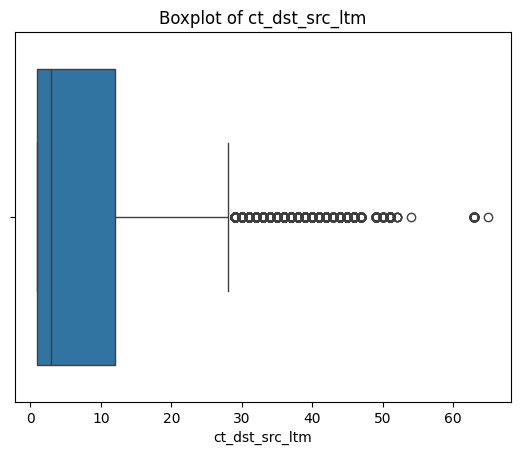

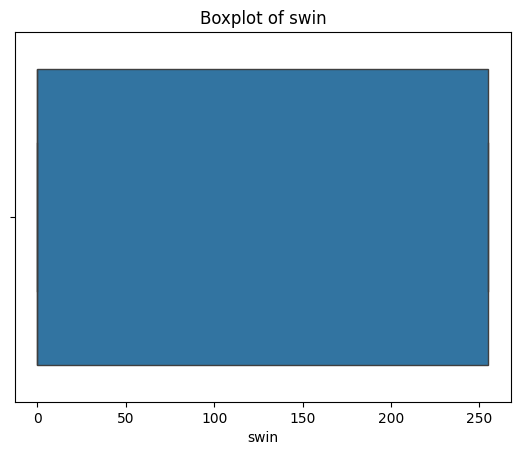

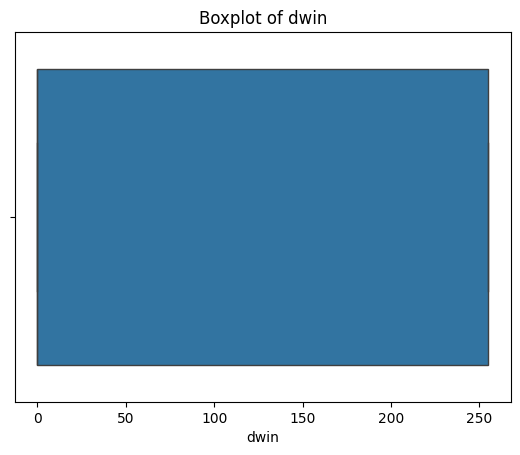

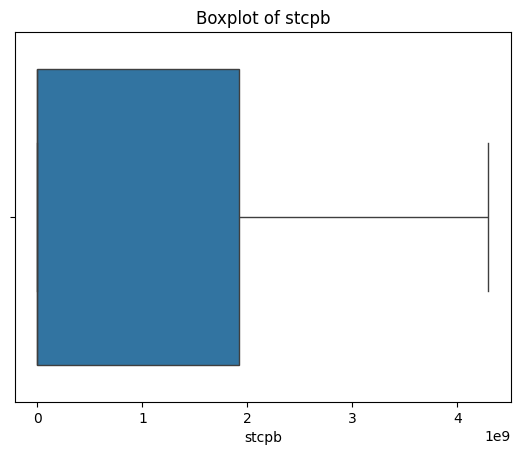

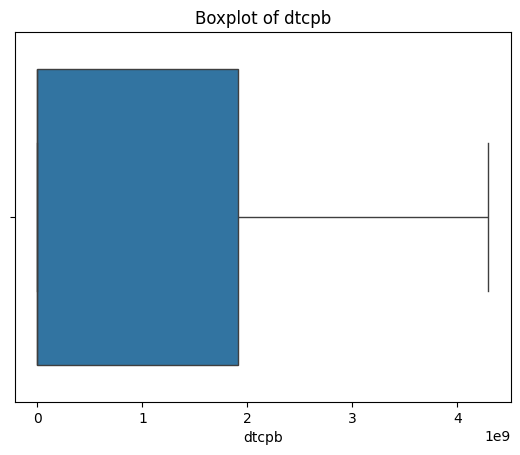

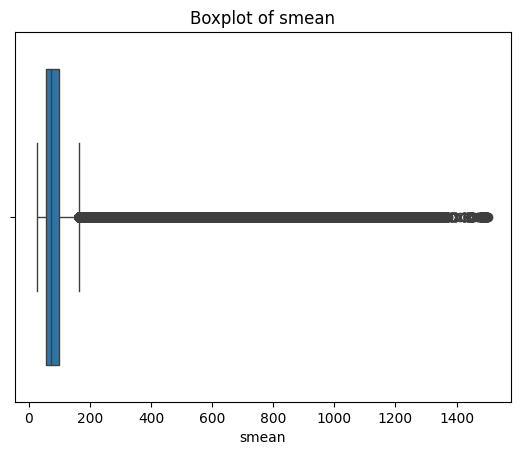

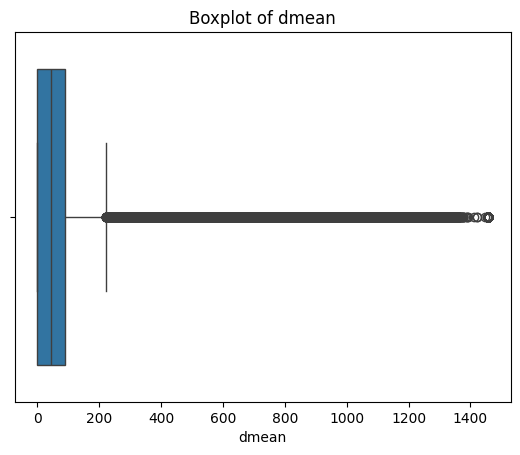

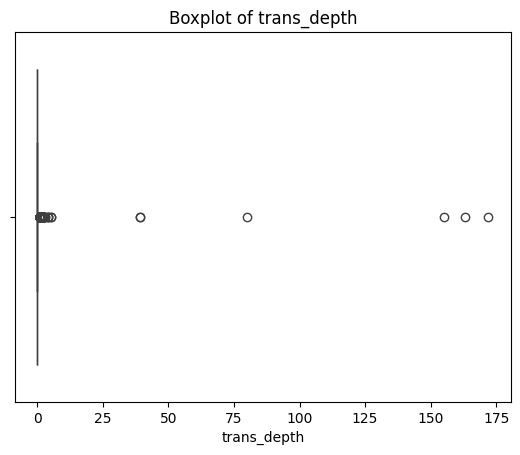

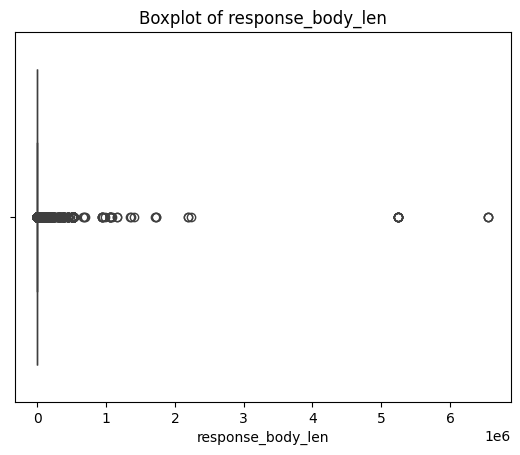

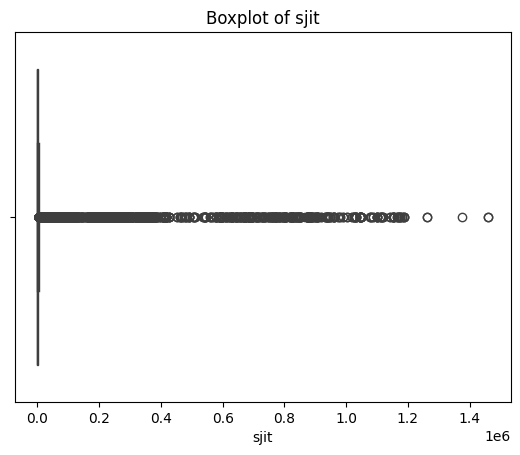

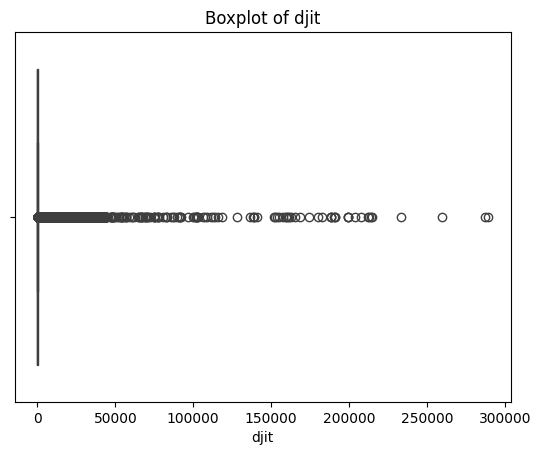

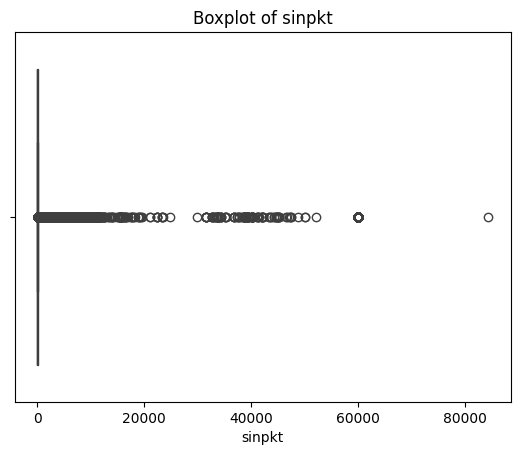

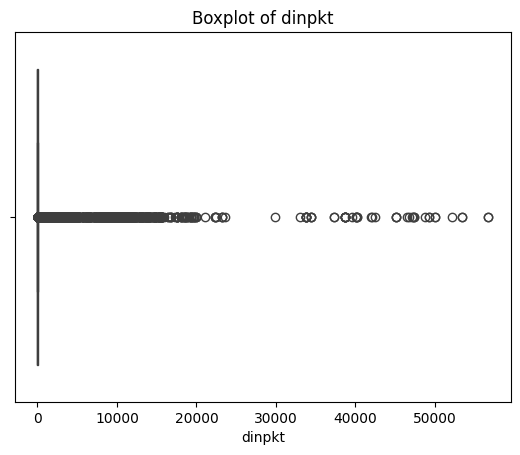

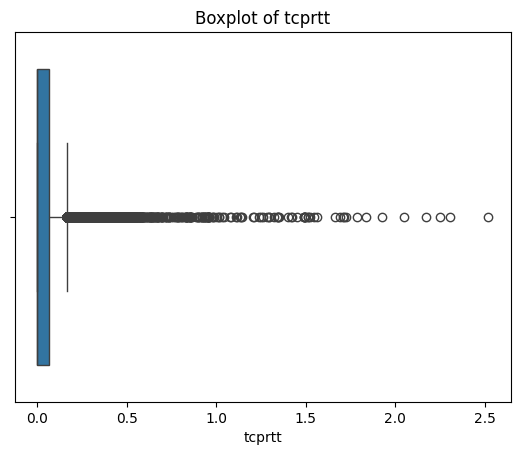

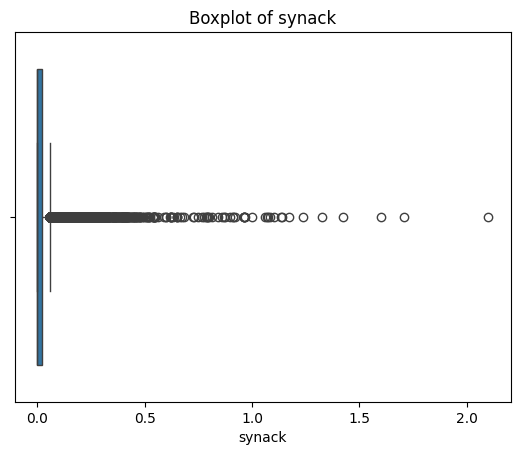

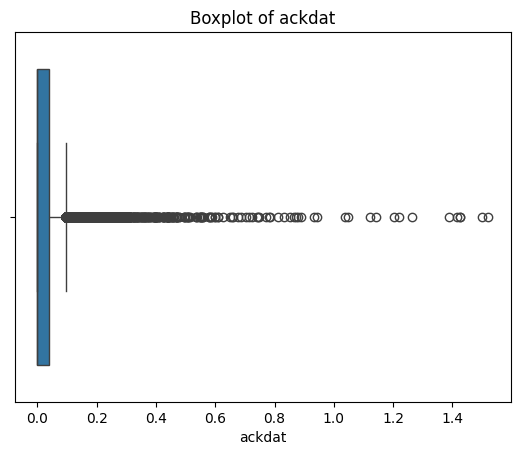

In [11]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [12]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
train_set, val_set = train_test_split(df, test_size=0.2, random_state=42)

# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

In [13]:
def clean_binary_columns(df, binary_columns):
    df_clean = df.copy()
    
    for col in binary_columns:
        # Print original value distribution
        print(f"\nCleaning {col}:")
        print("Original value distribution:")
        print(df_clean[col].value_counts(dropna=False))
        
        # Only replace values that are not 0, 1, or NaN with the mode of 0 and 1
        mask = (~df_clean[col].isin([0, 1])) & (~df_clean[col].isna())
        mode_binary = df_clean[col][df_clean[col].isin([0, 1])].mode()[0]
        
        # Replace invalid values (not 0, 1, or NaN) with the mode
        df_clean.loc[mask, col] = mode_binary
        
        # Print new value distribution
        print("\nNew value distribution:")
        print(df_clean[col].value_counts(dropna=False))
    
    return df_clean

# Use the function
binary_columns = ['is_sm_ips_ports', 'is_ftp_login']
df_cleaned = clean_binary_columns(train_set, binary_columns)


Cleaning is_sm_ips_ports:
Original value distribution:
is_sm_ips_ports
0.0    131146
NaN      7028
1.0      2098
Name: count, dtype: int64

New value distribution:
is_sm_ips_ports
0.0    131146
NaN      7028
1.0      2098
Name: count, dtype: int64

Cleaning is_ftp_login:
Original value distribution:
is_ftp_login
0.0    131432
NaN      6910
1.0      1915
4.0        11
2.0         4
Name: count, dtype: int64

New value distribution:
is_ftp_login
0.0    131447
NaN      6910
1.0      1915
Name: count, dtype: int64


### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [14]:


class NetworkTrafficImputer:
    def __init__(self):
        self.numerical_imputer = SimpleImputer(strategy='median')
        self.categorical_imputer = SimpleImputer(strategy='most_frequent')
        self.binary_imputer = SimpleImputer(strategy='most_frequent')
        
    def fit_transform(self, df):
        # Updated feature groups to include ALL features
        numerical_features = [
            # Flow-based features
            'sbytes', 'dbytes', 'spkts', 'dpkts', 'sload', 'dload', 'sloss', 'dloss',
            # Time-based features
            'dur', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat',
            # TCP features
            'swin', 'dwin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth',
            # Count features
            'ct_state_ttl', 'ct_flw_http_mthd', 'ct_ftp_cmd', 'ct_srv_src', 
            'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 
            'ct_dst_sport_ltm', 'ct_dst_src_ltm',
            # Additional numerical features that were missing
            'sttl', 'dttl', 'response_body_len'
        ]
        
        categorical_features = ['proto', 'service', 'state']
        binary_features = ['is_sm_ips_ports', 'is_ftp_login']
        
        df_imputed = df.copy()
        
        # Store original dtypes
        original_dtypes = df_imputed.dtypes
        
        # 1. Handle numerical features
        print("Imputing numerical features...")
        existing_num_features = [col for col in numerical_features if col in df.columns]
        if existing_num_features:
            df_imputed[existing_num_features] = self.numerical_imputer.fit_transform(
                df_imputed[existing_num_features]
            )
        
        # 2. Handle categorical features
        print("Imputing categorical features...")
        existing_cat_features = [col for col in categorical_features if col in df.columns]
        if existing_cat_features:
            df_imputed[existing_cat_features] = self.categorical_imputer.fit_transform(
                df_imputed[existing_cat_features]
            )
        
        # 3. Handle binary features
        print("Imputing binary features...")
        existing_bin_features = [col for col in binary_features if col in df.columns]
        if existing_bin_features:
            df_imputed[existing_bin_features] = self.binary_imputer.fit_transform(
                df_imputed[existing_bin_features]
            )
            # Ensure binary columns are 0 or 1
            for col in existing_bin_features:
                df_imputed[col] = df_imputed[col].astype(int)
                mask = ~df_imputed[col].isin([0, 1])
                if mask.any():
                    mode_val = df_imputed[col].mode()[0]
                    df_imputed.loc[mask, col] = mode_val
        
        # Restore original dtypes
        for col in df_imputed.columns:
            if col in original_dtypes:
                df_imputed[col] = df_imputed[col].astype(original_dtypes[col])
        
        # Print imputation summary
        print("\nImputation Summary:")
        print("-" * 50)
        missing_after = df_imputed.isnull().sum()
        
        if missing_after.sum() > 0:
            print("\nWarning: Some columns still have missing values:")
            print(missing_after[missing_after > 0])
        else:
            print("All missing values have been successfully imputed!")
        
        # Print value ranges for binary columns
        print("\nBinary Columns Check:")
        for col in existing_bin_features:
            unique_vals = sorted(df_imputed[col].unique())
            print(f"{col} unique values after imputation: {unique_vals}")
        
        return df_imputed

def handle_missing_values(df):
    print("Performing imputation...")
    imputer = NetworkTrafficImputer()
    df_imputed = imputer.fit_transform(df)
    return df_imputed

df_imputed = handle_missing_values(df_cleaned)

Performing imputation...
Imputing numerical features...
Imputing categorical features...
Imputing binary features...

Imputation Summary:
--------------------------------------------------
All missing values have been successfully imputed!

Binary Columns Check:
is_sm_ips_ports unique values after imputation: [0.0, 1.0]
is_ftp_login unique values after imputation: [0.0, 1.0]


### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

Original Data Statistics:
                 dur        sbytes        dbytes           sttl  \
count  140272.000000  1.402720e+05  1.402720e+05  140272.000000   
mean        1.292670  8.611639e+03  1.435932e+04     183.288960   
std         6.328743  1.712819e+05  1.401006e+05     101.632484   
min         0.000000  2.800000e+01  0.000000e+00       0.000000   
25%         0.000008  1.140000e+02  0.000000e+00      62.000000   
50%         0.001331  4.500000e+02  1.620000e+02     254.000000   
75%         0.625537  1.268000e+03  8.360000e+02     254.000000   
max        59.999989  1.296523e+07  1.465555e+07     255.000000   

                dttl          sloss          dloss         sload  \
count  140272.000000  140272.000000  140272.000000  1.402720e+05   
mean       77.014180       4.795761       6.655049  7.034209e+07   
std       108.254353      65.560607      50.474227  1.864810e+08   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%         0.000000       0.0

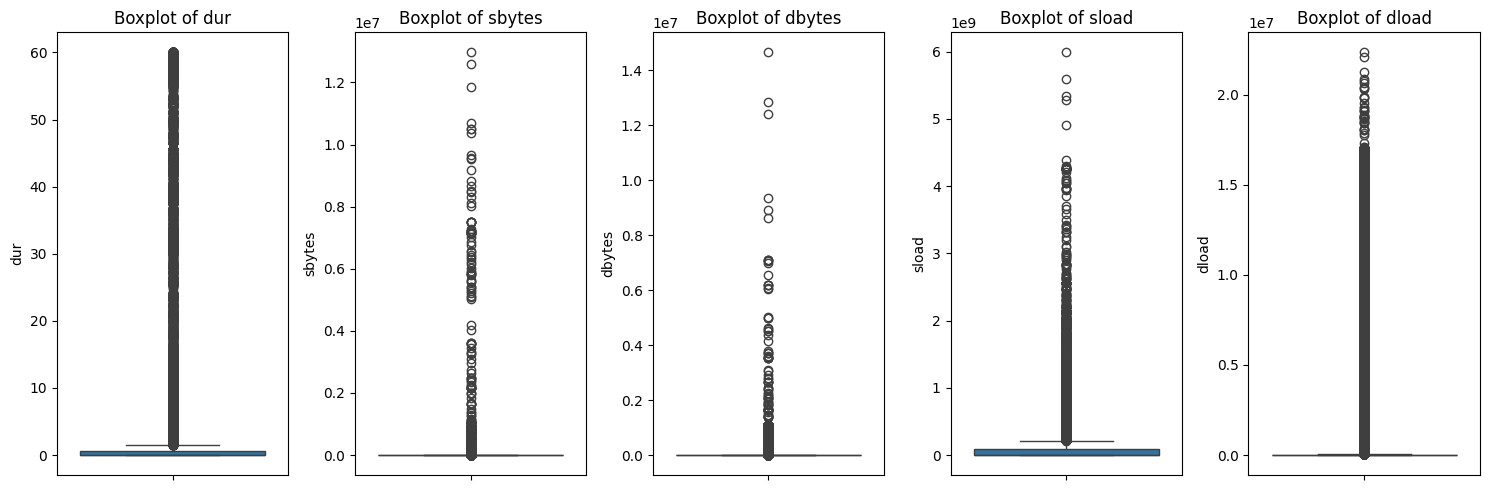


Handling outliers using clip method...

Cleaned Data Statistics:
                 dur         sbytes         dbytes           sttl  \
count  140272.000000  140272.000000  140272.000000  140272.000000   
mean        0.346719     906.780355     573.666170     183.288960   
std         0.535396    1026.533553     807.414274     101.632484   
min         0.000000      28.000000       0.000000       0.000000   
25%         0.000008     114.000000       0.000000      62.000000   
50%         0.001331     450.000000     162.000000     254.000000   
75%         0.625537    1268.000000     836.000000     254.000000   
max         1.563830    2999.000000    2090.000000     255.000000   

                dttl          sloss          dloss         sload  \
count  140272.000000  140272.000000  140272.000000  1.402720e+05   
mean       77.014180       1.465446       1.324676  4.743018e+07   
std       108.254353       1.928720       1.920667  6.793553e+07   
min         0.000000       0.000000     

In [15]:


class OutlierHandler:
    def __init__(self, contamination=1.5):
        """
        Initialize outlier handler
        contamination: IQR multiplier for outlier detection (default=1.5)
        """
        self.contamination = contamination
        self.boundaries = {}
        
    def detect_outliers(self, df, numerical_columns=None):
        """
        Detect outliers using IQR method
        """
        if numerical_columns is None:
            numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
            
        outlier_counts = {}
        boundaries = {}
        
        for column in numerical_columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - self.contamination * IQR
            upper_bound = Q3 + self.contamination * IQR
            
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
            outlier_counts[column] = len(outliers)
            boundaries[column] = {'lower': lower_bound, 'upper': upper_bound}
            
        self.boundaries = boundaries
        return outlier_counts, boundaries
    
    def plot_outliers(self, df, columns, figsize=(15, 5)):
        """
        Plot boxplots to visualize outliers
        """
        plt.figure(figsize=figsize)
        for i, column in enumerate(columns, 1):
            plt.subplot(1, len(columns), i)
            sns.boxplot(y=df[column])
            plt.title(f'Boxplot of {column}')
        plt.tight_layout()
        plt.show()
    
    def handle_outliers(self, df, method='clip', exclude_columns=None):
        """
        Handle outliers using specified method
        
        Parameters:
        - df: DataFrame
        - method: 'clip', 'remove', 'winsorize', or 'transform'
        - exclude_columns: list of columns to exclude from outlier handling
        """
        if exclude_columns is None:
            exclude_columns = []
            
        df_cleaned = df.copy()
        numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
        numerical_columns = [col for col in numerical_columns if col not in exclude_columns]
        
        # Detect outliers first
        _, boundaries = self.detect_outliers(df, numerical_columns)
        
        if method == 'clip':
            # Clip values to boundaries
            for column in numerical_columns:
                df_cleaned[column] = df_cleaned[column].clip(
                    lower=boundaries[column]['lower'],
                    upper=boundaries[column]['upper']
                )
                
        elif method == 'remove':
            # Remove rows with outliers
            for column in numerical_columns:
                mask = (df_cleaned[column] >= boundaries[column]['lower']) & \
                      (df_cleaned[column] <= boundaries[column]['upper'])
                df_cleaned = df_cleaned[mask]
                
        elif method == 'winsorize':
            # Replace outliers with boundary values
            for column in numerical_columns:
                lower = boundaries[column]['lower']
                upper = boundaries[column]['upper']
                df_cleaned[column] = df_cleaned[column].apply(
                    lambda x: lower if x < lower else (upper if x > upper else x)
                )
                
        elif method == 'transform':
            # Apply log transformation to reduce impact of outliers
            for column in numerical_columns:
                # Add small constant to handle zeros
                min_val = df_cleaned[column].min()
                if min_val < 0:
                    df_cleaned[column] = df_cleaned[column] - min_val + 1
                df_cleaned[column] = np.log1p(df_cleaned[column])
                
        return df_cleaned
    
    def summarize_outliers(self, df, numerical_columns=None):
        """
        Print summary statistics about outliers
        """
        outlier_counts, boundaries = self.detect_outliers(df, numerical_columns)
        
        print("Outlier Summary:")
        print("-" * 50)
        for column in outlier_counts:
            total_values = len(df[column])
            outlier_percentage = (outlier_counts[column] / total_values) * 100
            print(f"\n{column}:")
            print(f"Total outliers: {outlier_counts[column]}")
            print(f"Outlier percentage: {outlier_percentage:.2f}%")
            print(f"Lower bound: {boundaries[column]['lower']:.2f}")
            print(f"Upper bound: {boundaries[column]['upper']:.2f}")
            
def handle_network_traffic_outliers(df, method='clip', exclude_columns=None):
    """
    Complete pipeline for handling outliers in network traffic data
    """
    if exclude_columns is None:
        # Don't handle outliers for these columns by default
        exclude_columns = [
            'is_sm_ips_ports', 'is_ftp_login',  # binary columns
            'proto', 'service', 'state', 'attack_cat'  # categorical columns
        ]
    
    # Initialize outlier handler
    handler = OutlierHandler(contamination=1.5)
    
    # Get numerical columns
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    numerical_columns = [col for col in numerical_columns if col not in exclude_columns]
    
    # Print original statistics
    print("Original Data Statistics:")
    print(df[numerical_columns].describe())
    
    # Summarize outliers
    handler.summarize_outliers(df, numerical_columns)
    
    # Plot outliers for some key columns
    key_columns = ['dur', 'sbytes', 'dbytes', 'sload', 'dload']
    key_columns = [col for col in key_columns if col in df.columns]
    handler.plot_outliers(df, key_columns)
    
    # Handle outliers
    print(f"\nHandling outliers using {method} method...")
    df_cleaned = handler.handle_outliers(df, method=method, exclude_columns=exclude_columns)
    
    # Print new statistics
    print("\nCleaned Data Statistics:")
    print(df_cleaned[numerical_columns].describe())
    
    return df_cleaned

df_cleaned = handle_network_traffic_outliers(df_imputed, method='clip')

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

Step 1: Analyzing duplicates...

Duplicate Analysis Summary:
--------------------------------------------------
Total rows in dataset: 140272
Number of duplicate rows: 77945
Percentage of duplicates: 55.57%

Columns considered for duplicates: ['proto', 'service', 'state', 'dur', 'sbytes', 'dbytes']

Example of duplicate entries:
       state       dur  sbytes  dbytes   sttl  dttl  sloss  dloss service  \
106443   INT  0.000009   114.0     0.0  254.0   0.0    0.0    0.0     dns   
59406    INT  0.000009   114.0     0.0  254.0   0.0    0.0    0.0     dns   
63788    INT  0.000009   114.0     0.0  254.0   0.0    0.0    0.0     dns   
6166     INT  0.000000    46.0     0.0    0.0   0.0    0.0    0.0       -   
160365   INT  0.000009   200.0     0.0  254.0   0.0    0.0    0.0       -   

             sload  ...  response_body_len  proto  attack_cat  sjit  djit  \
106443  50666664.0  ...                0.0    udp     Generic   0.0   0.0   
59406   50666664.0  ...                0.0    udp   

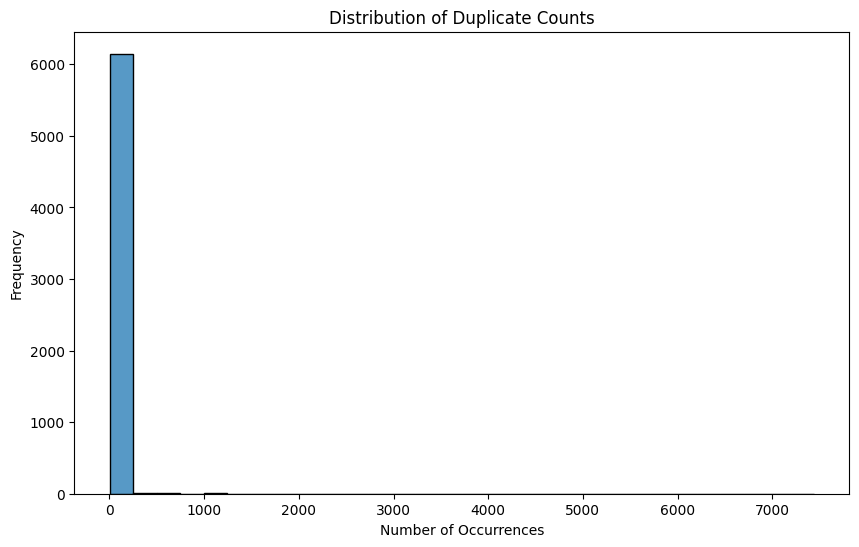


Step 3: Removing duplicates...

Duplicate Removal Summary:
--------------------------------------------------
Original number of rows: 140272
Rows after removing duplicates: 62327
Number of rows removed: 77945
Percentage of rows removed: 55.57%


In [16]:
class DuplicateHandler:
    def __init__(self):
        self.duplicate_info = {}
        
    def analyze_duplicates(self, df, subset=None):
        """
        Analyze duplicates in the dataset
        
        Parameters:
        - df: DataFrame
        - subset: List of columns to consider for duplicates (None for all columns)
        """
        total_duplicates = df.duplicated(subset=subset).sum()
        total_percentage = (total_duplicates / len(df)) * 100
        
        duplicate_rows = df[df.duplicated(subset=subset, keep='first')]
        
        self.duplicate_info = {
            'total_duplicates': total_duplicates,
            'total_percentage': total_percentage,
            'duplicate_rows': duplicate_rows
        }
        
        print("\nDuplicate Analysis Summary:")
        print("-" * 50)
        print(f"Total rows in dataset: {len(df)}")
        print(f"Number of duplicate rows: {total_duplicates}")
        print(f"Percentage of duplicates: {total_percentage:.2f}%")
        
        if subset:
            print(f"\nColumns considered for duplicates: {subset}")
        
        if total_duplicates > 0:
            print("\nExample of duplicate entries:")
            print(duplicate_rows.head())
            
            if subset:
                dup_counts = df.groupby(subset).size().reset_index(name='count')
                dup_counts = dup_counts[dup_counts['count'] > 1].sort_values('count', ascending=False)
                print("\nTop duplicate combinations:")
                print(dup_counts.head())
        
        return self.duplicate_info
    
    def plot_duplicate_distribution(self, df, subset=None):
        """
        Plot distribution of duplicate counts
        """
        if subset:
            dup_counts = df.groupby(subset).size().reset_index(name='count')
            dup_counts = dup_counts[dup_counts['count'] > 1]
        else:
            dup_counts = df.groupby(list(df.columns)).size().reset_index(name='count')
            dup_counts = dup_counts[dup_counts['count'] > 1]
        
        if len(dup_counts) > 0:
            plt.figure(figsize=(10, 6))
            sns.histplot(data=dup_counts, x='count', bins=30)
            plt.title('Distribution of Duplicate Counts')
            plt.xlabel('Number of Occurrences')
            plt.ylabel('Frequency')
            plt.show()
        else:
            print("No duplicates found to plot.")
    
    def remove_duplicates(self, df, subset=None, keep='first', reset_index=True):
        """
        Remove duplicates from the dataset
        
        Parameters:
        - df: DataFrame
        - subset: List of columns to consider for duplicates (None for all columns)
        - keep: {'first', 'last', False}, default 'first'
        - reset_index: Boolean, whether to reset index after removal
        """
        original_shape = df.shape
        
        df_cleaned = df.drop_duplicates(subset=subset, keep=keep)
        
        if reset_index:
            df_cleaned = df_cleaned.reset_index(drop=True)
        
        rows_removed = original_shape[0] - df_cleaned.shape[0]
        removal_percentage = (rows_removed / original_shape[0]) * 100
        
        print("\nDuplicate Removal Summary:")
        print("-" * 50)
        print(f"Original number of rows: {original_shape[0]}")
        print(f"Rows after removing duplicates: {df_cleaned.shape[0]}")
        print(f"Number of rows removed: {rows_removed}")
        print(f"Percentage of rows removed: {removal_percentage:.2f}%")
        
        return df_cleaned

def handle_network_traffic_duplicates(df, subset=None, keep='first'):
    """
    Complete pipeline for handling duplicates in network traffic data
    
    Parameters:
    - df: DataFrame
    - subset: List of columns to consider for duplicates (None for all columns)
    - keep: {'first', 'last', False}, default 'first'
    """
    handler = DuplicateHandler()
    
    if subset is None:
        exclude_cols = ['id', 'index', 'timestamp']
        subset = [col for col in df.columns if col not in exclude_cols]
    
    print("Step 1: Analyzing duplicates...")
    handler.analyze_duplicates(df, subset=subset)
    
    print("\nStep 2: Visualizing duplicate distribution...")
    handler.plot_duplicate_distribution(df, subset=subset)
    
    print("\nStep 3: Removing duplicates...")
    df_cleaned = handler.remove_duplicates(df, subset=subset, keep=keep)
    
    return df_cleaned

subset_columns = ['proto', 'service', 'state', 'dur', 'sbytes', 'dbytes'] 
train_set_cleaned = handle_network_traffic_duplicates(df_cleaned, subset=subset_columns, keep='first')

### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [17]:
# Write your code here

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [18]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [19]:

class FeatureScaler(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        self.scaler = RobustScaler().fit(X)
        return self

    def transform(self, X):
        X_scaled = X.copy()
        X_scaled = self.scaler.transform(X_scaled)
        return X_scaled

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [20]:


class FeatureEncoder(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        self.encoder = OneHotEncoder().fit(X)
        return self

    def transform(self, X):
        X_encoded = X.copy()
        X_encoded = self.encoder.transform(X_encoded)
        return X_encoded

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [21]:

class OverSampler(BaseEstimator, TransformerMixin):
    
    def __init__(self, sampling_strategy='auto'): 
        self.sampling_strategy = sampling_strategy

    def fit(self, X, y=None):
        self.smote = SMOTE(sampling_strategy=self.sampling_strategy)
        return self

    def transform(self, X, y):
        X_resampled, y_resampled = self.smote.fit_resample(X, y)
        return X_resampled, y_resampled

In [22]:

class UnderSampler(BaseEstimator, TransformerMixin):
    
    def __init__(self, sampling_strategy='auto'): 
        self.sampling_strategy = sampling_strategy

    def fit(self, X, y=None):
        self.under_sampler = RandomUnderSampler(sampling_strategy=self.sampling_strategy)
        return self

    def transform(self, X, y):
        X_resampled, y_resampled = self.under_sampler.fit_resample(X, y)
        return X_resampled, y_resampled

### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

In [23]:
# Write your code here

### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

In [43]:
class TSNEReducer(BaseEstimator, TransformerMixin):
    
    def __init__(self, n_components=3): 
        self.n_components = n_components

    def fit(self, X, y=None):
        self.tsne = TSNE(n_components=self.n_components, init='random')
        return self

    def transform(self, X):
        X_reduced = X.copy()
        X_reduced = self.tsne.fit_transform(X_reduced)
        return X_reduced

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [ ]:

y_train_set_cleaned = train_set_cleaned['attack_cat']
x_train_set_cleaned = train_set_cleaned.drop(columns=['attack_cat'], axis=1 )
numeric_features = x_train_set_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_features = x_train_set_cleaned.select_dtypes(include=['object']).columns

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', FeatureScaler(), numeric_features),
        ('cat', FeatureEncoder(), categorical_features)
    ]
)

# Create pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('tsne', TSNEReducer())
])

# Fit and transform
train_set = pipe.fit_transform(x_train_set_cleaned, y_train_set_cleaned)
val_set_transformed = pipe.transform(val_set)

In [55]:
# # Your code should work up until this point
# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

or create your own here

In [56]:
# Write your code here

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [57]:
# Type your code here



class KNeighborsClassifier():
    def __init__(self, n_neighbors=5, metric="euclidean", p=None):
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.p = p

        if not isinstance(n_neighbors, int):
            raise TypeError(f"n_neighbors must be an integer, got {type(n_neighbors).__name__} instead.")

        if self.metric == "manhattan" and self.p not in (None, 1):
            raise ValueError("when metric='manhattan', p should be None or 1.")
        if self.metric == "euclidean" and self.p not in (None, 2):
            raise ValueError("when metric='euclidean', p should be None or 2.")
        if metric == "minkowski" and p is None:
            raise ValueError("For metric='minkowski', you must specify a value for p.")

    def fit(self, X, y):
        self.X = np.asarray(X)
        self.y = np.asarray(y)

    def predict(self, X):
        return np.array([self._predict(x) for x in X])

    def _predict(self, x):
        if self.metric == "manhattan":
            dist = np.sum(np.abs(self.X - x), axis=1)
        elif self.metric == "euclidean":
            dist = np.linalg.norm(self.X - x, axis=1)
        elif self.metric == "minkowski":
            dist = np.sum(np.abs(self.X - x) ** self.p, axis=1) ** (1 / self.p)

        nearest_indices = np.argsort(dist)[:self.n_neighbors]
        nearest_labels = self.y[nearest_indices]
        prediction = np.bincount(nearest_labels).argmax()
        
        return prediction


## B. Naive Bayes

In [58]:
# Type your code here

## C. ID3

In [59]:
# Type your code here

## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [60]:
# Type your code here

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [61]:
# Type your code here

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`